In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import matplotlib
import matplotlib.pyplot as plt

import time
from datetime import datetime 



start_time = datetime.now() 

In [2]:
df = pd.read_csv("Desktop\Arpeely\data_assignment\data_assignment.csv", low_memory=False)
df['time'] = [df['time'][i][:19] for i in range(len(df['time']))]
df

,time,user_id,domain,url,ad_slot,country,postal_code,state_code,city,user_agent,...,publisher_properties,is_wifi,viewability,session_depth,auction_type,bidded,bid,won_bid,feedback_bid,conversion
0,2021-02-01 02:06:25,11f8b8ea-877a-466e-9a99-d216d5f21c97,8cf5a15cad4d2d30d8e0f61fd8b445b7,6f4424cb37e31fe318d30440cc514a34,5f724d746d2d8d77bb67367f4789057b,US,37934.0,TN,Knoxville,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:8...,...,c4c21ab5a7e413bab0be6466015b0e28,1,91,-1,FIRST_PRICE,0,NaN,NaN,NaN,NaN
1,2021-02-01 17:31:54,fe106e58-d82a-4090-a519-d27e7029a570,2a2634d779829898f0e0e875ca8a3e8e,de09a25cdd26b9f0f3e8c301f895ca1c,c97cf7483babf3a6eba698bd487697dc,US,21133.0,MD,Owings Mills,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:8...,...,b8930fad09becdba3c8ee8edfc6c97c7,1,91,-1,FIRST_PRICE,1,1.649047,0.0,2.16,0.0
2,2021-02-01 00:09:08,d0997020-e8d5-4152-88e0-80cc1622bade,728d6192b848c3d7f0addbea66fc1190,f9692123bcb6e9f31ac7fa07c7a74159,acc645d4b2897df49793abac420b173e,US,NaN,TX,Houston,Mozilla/5.0 (Linux; Android 8.0.0; XT1710-02 B...,...,0ef9787a96bd07ec5524e609b71f9f47,0,49,-1,FIRST_PRICE,1,1.005495,1.0,0.44,1.0
3,2021-02-01 20:17:32,f1094d97-6313-4da8-8c85-e7dfecb2ca90,0ce6ea0c3d676338114b5bc1f1ba16ff,58040ef32a5ccf0c3e59948a7e2c7a4d,feb283bf191f006e9aaefb146607adc5,US,NaN,NJ,Wenonah,Mozilla/5.0 (Linux; Android 8.1.0; SM-J727V) A...,...,f3bcfa435dfe59e35f56198c3dfb77df,1,80,10,FIRST_PRICE,1,5.852967,0.0,7.88,0.0
4,2021-02-01 23:06:22,d85a0357-68c3-4d6f-8246-83ecb4d78cdf,c872fb4013f4d18cfb46151e16f4eacf,70379bbed05d953c9cc93d3feb9ad97d,199ce344fda73e2f79a9a45da6100d60,US,99654.0,AK,Wasilla,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6...,...,6e18c7c8ae1bb87362c33ce86fd3d4bd,1,96,3,FIRST_PRICE,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249227,2021-02-01 19:19:21,9df7192b-64c7-4b96-ac54-1dbd94e43ba1,0ce6ea0c3d676338114b5bc1f1ba16ff,6b50a15889f2a5f2c1aa44eb70604f30,a05c0fe18824eaf96d954aeb8ad856d1,US,8060.0,NaN,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_3...,...,15d90432cffb6a5d1cf64252a0ccc3cf,1,93,-1,FIRST_PRICE,1,5.163571,1.0,0.85,0.0
249228,2021-02-01 23:40:55,2acb3c3b-f3c8-497d-a295-ae592ff962cc,3b226022f63f9141dfb135cca397d4ab,a26a8dd91443c5b1d3741d3bb8ea2488,2702a0b67ab6e0a8c155eee656adc6f2,US,29615.0,SC,Taylors,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,...,206f49f20263824bceaaf070c567dd18,1,85,-1,FIRST_PRICE,0,NaN,NaN,NaN,NaN
249229,2021-02-01 20:35:08,9ddc9833-bdba-426e-bafd-a4cd4ca8355a,ca9f0c0d7cb9b24332b5207ab1135eb4,6ad7cc7874a6a93d85efc43a75b89da4,76fd0541633fba20a617152f0312ac1a,US,NaN,GA,Dalton,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,...,01e180345c37f47ca7c3f272c4009689,1,46,-1,SECOND_PRICE,0,NaN,NaN,NaN,NaN
249230,2021-02-01 21:29:04,81d6c07b-ed8b-4b98-ae72-aeccc354cda8,72176b0a9cef78b04179f9f273464ce1,0f05986431c533771c10fdb086809f1f,dbbdc3150d35041cb468a4cc87a2532c,US,40771.0,KY,Corbin,Mozilla/5.0 (iPhone; CPU iPhone OS 14_3 like M...,...,c66afd784f43b768d95a6b451161d8d7,1,13,-1,FIRST_PRICE,1,0.095408,1.0,0.04,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249232 entries, 0 to 249231
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   time                  249232 non-null  object 
 1   user_id               249232 non-null  object 
 2   domain                249222 non-null  object 
 3   url                   249232 non-null  object 
 4   ad_slot               249232 non-null  object 
 5   country               249232 non-null  object 
 6   postal_code           201974 non-null  object 
 7   state_code            240773 non-null  object 
 8   city                  236697 non-null  object 
 9   user_agent            249194 non-null  object 
 10  cookie_age_seconds    249232 non-null  int64  
 11  detected_language     249033 non-null  object 
 12  device_type           249232 non-null  object 
 13  device_brand          111686 non-null  object 
 14  device_model          111687 non-null  object 
 15  

In [4]:
df = df.dropna()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43390 entries, 13 to 249230
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  43390 non-null  object 
 1   user_id               43390 non-null  object 
 2   domain                43390 non-null  object 
 3   url                   43390 non-null  object 
 4   ad_slot               43390 non-null  object 
 5   country               43390 non-null  object 
 6   postal_code           43390 non-null  object 
 7   state_code            43390 non-null  object 
 8   city                  43390 non-null  object 
 9   user_agent            43390 non-null  object 
 10  cookie_age_seconds    43390 non-null  int64  
 11  detected_language     43390 non-null  object 
 12  device_type           43390 non-null  object 
 13  device_brand          43390 non-null  object 
 14  device_model          43390 non-null  object 
 15  screen_orientatio

In [6]:
def plot(column, name_x, name_y):
    title = name_x
    col = df[column][:100].tolist()
    name_x = df[name_x][:100].tolist()
    plt.plot(col, name_x, marker = "o", linewidth = 3, color = 'steelblue')

    plt.xlabel('col')
    plt.ylabel('name_y')
    plt.xticks([])
    plt.title(title)
    plt.style.use('default')
    plt.yticks()
    plt.show()

In [7]:
# df.groupby(['time', 'conversion']).size().unstack().plot(kind='bar', title="Hour of Day", figsize=(12,6))
# plt.ylabel('count')
# plt.title('Hourly impressions vs. clicks')

In [8]:
print('Value_counts')
print(df.time.value_counts())
print()
print('Describe')
print(df.time.describe())

### Same date - 2021-02-01, different hours

Value_counts
2021-02-01 01:35:20    7
2021-02-01 02:11:28    6
2021-02-01 02:19:41    6
2021-02-01 04:28:34    6
2021-02-01 01:40:51    6
                      ..
2021-02-01 06:01:25    1
2021-02-01 01:39:12    1
2021-02-01 14:50:15    1
2021-02-01 00:04:23    1
2021-02-01 15:09:28    1
Name: time, Length: 32909, dtype: int64

Describe
count                   43390
unique                  32909
top       2021-02-01 01:35:20
freq                        7
Name: time, dtype: object


Text(0.5, 1.0, 'Number of clicks by hour')

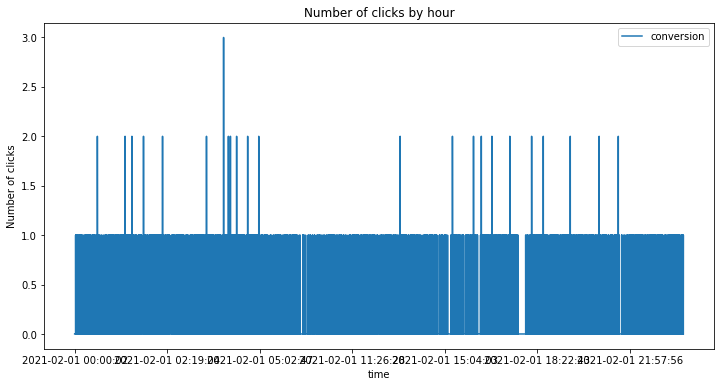

In [9]:
df.groupby('time').agg({'conversion':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by hour')

### We can see here that most of clicks take place at not deep night hours.
### The Data is from one day.

In [10]:
print('Value_counts')
print(df.user_id.value_counts())
print()
print('Describe')
print(df.user_id.describe())

### Each user is unique

Value_counts
74eecb91-ea99-4d9d-a14a-80b3ebdd4000    1
995c4f00-5218-46c4-a676-30a6b03abd27    1
84690700-5d11-44ef-8897-9a65cdcb7699    1
b76592e0-85b2-4014-ba3d-44cfb101e4ba    1
1049203c-89b2-41b1-b1a8-d070884bb180    1
                                       ..
95be121f-45fb-479b-8214-887a5b8c820f    1
309ba3e2-4044-4f2a-bf3f-4ec861558990    1
83d2defd-fff4-421f-a0dd-b74a15adb8f1    1
83c8df14-2df6-4bf1-9e57-fdec377acea9    1
026d3f14-816d-467b-84ba-ae466b8c115b    1
Name: user_id, Length: 43390, dtype: int64

Describe
count                                    43390
unique                                   43390
top       74eecb91-ea99-4d9d-a14a-80b3ebdd4000
freq                                         1
Name: user_id, dtype: object


In [11]:
print('Value_counts')
print(df.domain.value_counts())
print()
print('Describe')
print(df.domain.describe())

Value_counts
8b04c90a35224e289bddd5c30e7ce71a    7636
08bc22c8f1ab109ab5400761942ffc59    4415
7bf950633ab64a9edbe40d6cf12f2425    2127
cc66670e68952aaaf80bf6a2d6cbd38a    1802
6b7afebe1382bbae9ae594d2e590a349    1782
                                    ... 
f08ba47556e4bc717915a2a5321f749f       1
6eb653eb1255637d21b2e2203f0ee20a       1
c2297fa3d45337a0b977ff41afe99fe3       1
cb1e2a9586d5801d81b9f3f76fe9ca30       1
d47e8e0de7f386e677f5a52f064412a8       1
Name: domain, Length: 193, dtype: int64

Describe
count                                43390
unique                                 193
top       8b04c90a35224e289bddd5c30e7ce71a
freq                                  7636
Name: domain, dtype: object


In [12]:
print('Value_counts')
print(df.url.value_counts())
print()
print('Describe')
print(df.url.describe())

Value_counts
6f42bc8309262f0410052052bddd0a4e    7636
347787d250deda7e64c8ec85688431cd    1782
bca1ece294516ea025e851a2fefc64d7    1156
b6500da717c406362728036542a8a8f3    1049
6768cc8205ae4d7020765f2c2376f852     827
                                    ... 
73b9f7d564792a45d276e2b4b6761f1b       1
07ca3ae8afe1a75a1a1f2529721cf225       1
eef1bac501d4c35bb50e4c45e2ce9fba       1
3c7a377f60e9206daffd446018867fe2       1
e4949f763e59dc7dd2ad5de3c983bcec       1
Name: url, Length: 2012, dtype: int64

Describe
count                                43390
unique                                2012
top       6f42bc8309262f0410052052bddd0a4e
freq                                  7636
Name: url, dtype: object


In [13]:
print('Value_counts')
print(df.ad_slot.value_counts())
print()
print('Describe')
print(df.ad_slot.describe())

Value_counts
b72f582e031620e00cdd552e161f03df    1270
cf566bfb3813d744397494d415f4800d     985
2dec94733a24ab8514eba29d3150dc1f     867
447be426adae1b0f96e779337c193f9e     729
d6c72f4402061aa8f708ec21def5279a     683
                                    ... 
b8fec2fd18334202827bda5d4d32ad80       1
367fde02602981db63881271f7fbc3ff       1
a238e95fbc49339553973ddb7903747e       1
c6df57aadb907107b1fd326c1a9e4ceb       1
9579d0595f78e9ad2a0e09b471b5b26b       1
Name: ad_slot, Length: 2064, dtype: int64

Describe
count                                43390
unique                                2064
top       b72f582e031620e00cdd552e161f03df
freq                                  1270
Name: ad_slot, dtype: object


In [14]:
print('Value_counts')
print(df.country.value_counts())
print()
print('Describe')
print(df.country.describe())

### Same country - USA

Value_counts
US    43390
Name: country, dtype: int64

Describe
count     43390
unique        1
top          US
freq      43390
Name: country, dtype: object


In [15]:
print('Value_counts')
print(df.postal_code.value_counts())
print()
print('Describe')
print(df.postal_code.describe())

Value_counts
87120.0    27
96819.0    25
87120      18
77479.0    16
85225.0    16
           ..
85658       1
77465.0     1
49285.0     1
78227       1
98942.0     1
Name: postal_code, Length: 19924, dtype: int64

Describe
count       43390
unique      19924
top       87120.0
freq           27
Name: postal_code, dtype: object


In [16]:
print('Value_counts')
print(df.state_code.value_counts())
print()
print('Describe')
print(df.state_code.describe())

### All 51 states of Amercia

Value_counts
FL    3303
TX    3192
CA    3181
NY    2452
PA    2021
OH    1838
IL    1748
NC    1555
NJ    1549
GA    1508
MI    1451
VA    1167
MA    1046
WA    1030
MD     993
IN     976
AZ     972
TN     959
MO     844
CO     826
WI     781
MN     730
SC     708
CT     661
AL     641
KY     634
LA     552
OR     540
IA     482
OK     475
NV     409
KS     383
AR     347
UT     330
MS     311
WV     305
NE     282
NM     276
NH     254
HI     215
ME     204
RI     193
ID     187
DE     182
MT     144
ND     117
SD     105
AK      91
VT      89
WY      87
DC      64
Name: state_code, dtype: int64

Describe
count     43390
unique       51
top          FL
freq       3303
Name: state_code, dtype: object


<AxesSubplot:title={'center':'banner position histogram'}, xlabel='state_code'>

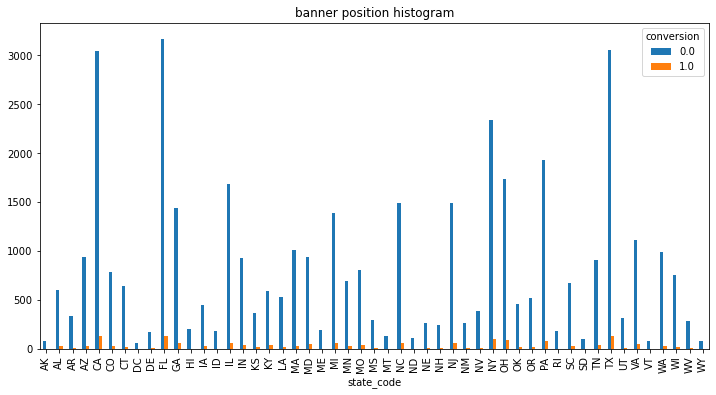

In [17]:
df.groupby(['state_code', 'conversion']).size().unstack().plot(kind='bar', figsize=(12,6), title='banner position histogram')

In [18]:
print('Value_counts')
print(df.city.value_counts())
print()
print('Describe')
print(df.city.describe())

Value_counts
Chicago         298
Houston         283
Phoenix         275
San Antonio     274
Brooklyn        247
               ... 
Cool Ridge        1
Ahoskie           1
Portageville      1
Kennett           1
Barnard           1
Name: city, Length: 5275, dtype: int64

Describe
count       43390
unique       5275
top       Chicago
freq          298
Name: city, dtype: object


In [19]:
print('Value_counts')
print(df.user_agent.value_counts())
print()
print('Describe')
print(df.user_agent.describe())

Value_counts
Mozilla/5.0 (iPhone; CPU iPhone OS 14_3 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.0.2 Mobile/15E148 Safari/604.1                                                                           4416
Mozilla/5.0 (iPhone; CPU iPhone OS 14_4 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.0.3 Mobile/15E148 Safari/604.1                                                                           1403
Mozilla/5.0 (iPhone; CPU iPhone OS 14_3 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148 [FBAN/FBIOS;FBDV/iPhone12,1;FBMD/iPhone;FBSN/iOS;FBSV/14.3;FBSS/2;FBID/phone;FBLC/en_US;FBOP/5]        912
Mozilla/5.0 (iPhone; CPU iPhone OS 14_3 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148 [FBAN/FBIOS;FBDV/iPhone11,8;FBMD/iPhone;FBSN/iOS;FBSV/14.3;FBSS/2;FBID/phone;FBLC/en_US;FBOP/5]        792
Mozilla/5.0 (iPhone; CPU iPhone OS 14_3 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) GSA/137.2.345735309 Mob

In [20]:
print('Value_counts')
print(df.cookie_age_seconds.value_counts())
print()
print('Describe')
print(df.cookie_age_seconds.describe())

Value_counts
0           24081
2592000      1780
5184000      1427
12960000     1405
7776000      1226
            ...  
50400          11
46800          10
61200          10
54000           9
72000           8
Name: cookie_age_seconds, Length: 77, dtype: int64

Describe
count    4.339000e+04
mean     7.636785e+06
std      1.333096e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.036800e+07
max      6.220800e+07
Name: cookie_age_seconds, dtype: float64


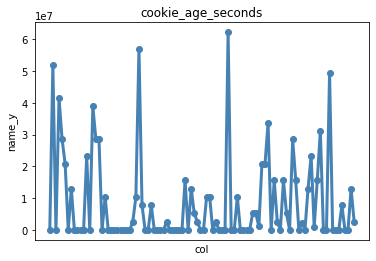

In [21]:
plot('user_id', 'cookie_age_seconds', 'cookie_age_seconds')

In [22]:
print('Value_counts')
print(df.detected_language.value_counts())
print()
print('Describe')
print(df.detected_language.describe())

Value_counts
en    43149
es      225
id       11
pt        5
Name: detected_language, dtype: int64

Describe
count     43390
unique        4
top          en
freq      43149
Name: detected_language, dtype: object


<AxesSubplot:title={'center':'banner position histogram'}, xlabel='detected_language'>

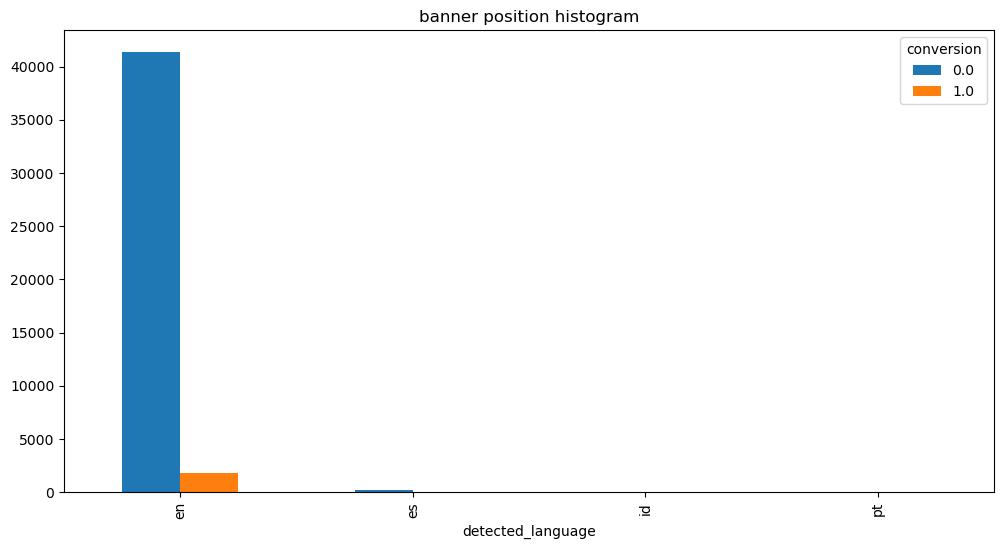

In [23]:
df.groupby(['detected_language', 'conversion']).size().unstack().plot(kind='bar', figsize=(12,6), title='banner position histogram')

In [24]:
print('Value_counts')
print(df.device_type.value_counts())
print()
print('Describe')
print(df.device_type.describe())

Value_counts
HIGHEND_PHONE    40992
TABLET            2396
GAME_CONSOLE         2
Name: device_type, dtype: int64

Describe
count             43390
unique                3
top       HIGHEND_PHONE
freq              40992
Name: device_type, dtype: object


<AxesSubplot:title={'center':'banner position histogram'}, xlabel='device_type'>

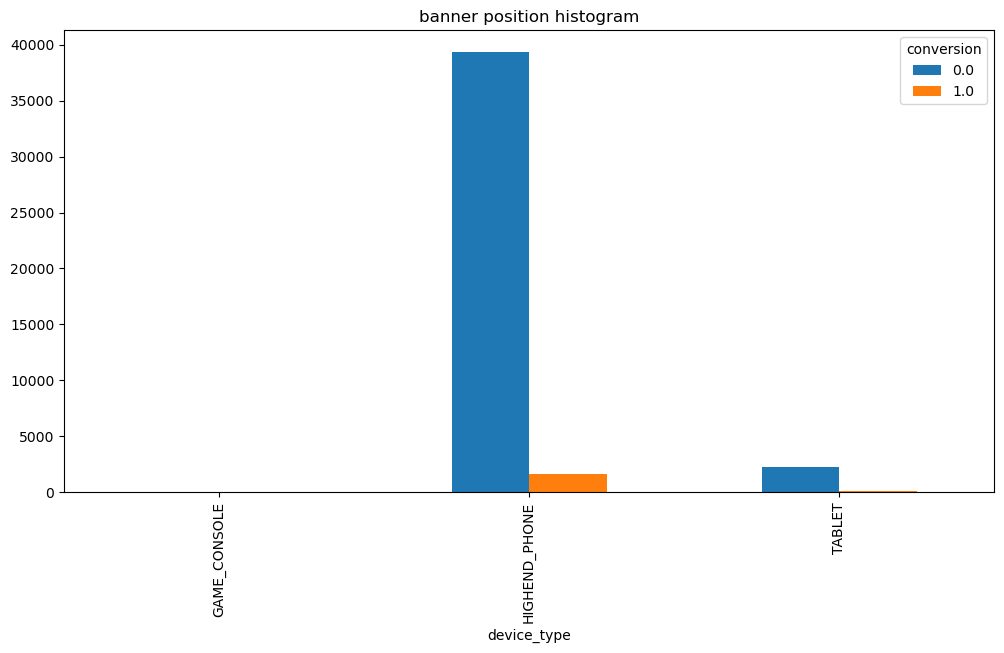

In [25]:
df.groupby(['device_type', 'conversion']).size().unstack().plot(kind='bar', figsize=(12,6), title='banner position histogram')

In [26]:
print('Value_counts')
print(df.device_brand.value_counts())
print()
print('Describe')
print(df.device_brand.describe())

Value_counts
apple               21323
samsung             14554
lg                   2656
motorola             2019
google               1080
                    ...  
cubot                   1
zopo                    1
barnes and noble        1
nuu                     1
infinix                 1
Name: device_brand, Length: 64, dtype: int64

Describe
count     43390
unique       64
top       apple
freq      21323
Name: device_brand, dtype: object


<AxesSubplot:title={'center':'banner position histogram'}, xlabel='device_brand'>

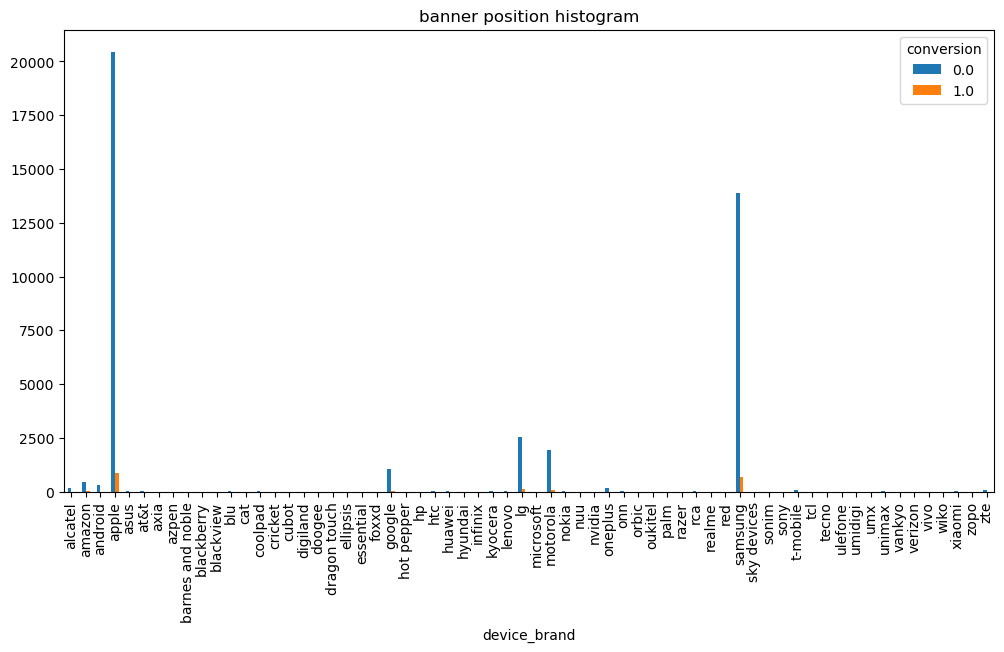

In [27]:
df.groupby(['device_brand', 'conversion']).size().unstack().plot(kind='bar', figsize=(12,6), title='banner position histogram')

In [28]:
print('Value_counts')
print(df.device_model.value_counts())
print()
print('Describe')
print(df.device_model.describe())

Value_counts
iphone       20007
ipad          1310
sm-g960u      1089
sm-g973u       814
sm-g975u       729
             ...  
lm-x510mw        1
x9i              1
pb2-650y         1
as998            1
s60lite          1
Name: device_model, Length: 889, dtype: int64

Describe
count      43390
unique       889
top       iphone
freq       20007
Name: device_model, dtype: object


In [29]:
print('Value_counts')
print(df.screen_orientation.value_counts())
print()
print('Describe')
print(df.screen_orientation.describe())

### One screen_orientation - UNKNOWN_ORIENTATION

Value_counts
UNKNOWN_ORIENTATION    43390
Name: screen_orientation, dtype: int64

Describe
count                   43390
unique                      1
top       UNKNOWN_ORIENTATION
freq                    43390
Name: screen_orientation, dtype: object


In [30]:
print('Value_counts')
print(df.publisher_properties.value_counts())
print()
print('Describe')
print(df.publisher_properties.describe())

Value_counts
97e9044692d3df04de93f6450265cb2e    8292
def51bba75ae6a6e5b20e3dc9038df40    4474
0e67e5ac52c43c9a810c344540525fff    2230
b6a9eb75731ff93ba57ac1595091c486    2136
a841cf8c2487af452679e60a8941348d    1714
                                    ... 
14d158e08e64901666dab2ae1a86ecc5       1
dde44681e3102becae300d9d2ba85575       1
147cb79c8855396f168d360d67ad5bd7       1
8532730ba4da755fbdb9c6d2da2f493e       1
885638fc11db6e1b214ed11917685f61       1
Name: publisher_properties, Length: 190, dtype: int64

Describe
count                                43390
unique                                 190
top       97e9044692d3df04de93f6450265cb2e
freq                                  8292
Name: publisher_properties, dtype: object


In [31]:
print('Value_counts')
print(df.is_wifi.value_counts())
print()
print('Describe')
print(df.is_wifi.describe())

Value_counts
1    43250
0      140
Name: is_wifi, dtype: int64

Describe
count    43390.000000
mean         0.996773
std          0.056712
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: is_wifi, dtype: float64


<AxesSubplot:title={'center':'banner position histogram'}, xlabel='is_wifi'>

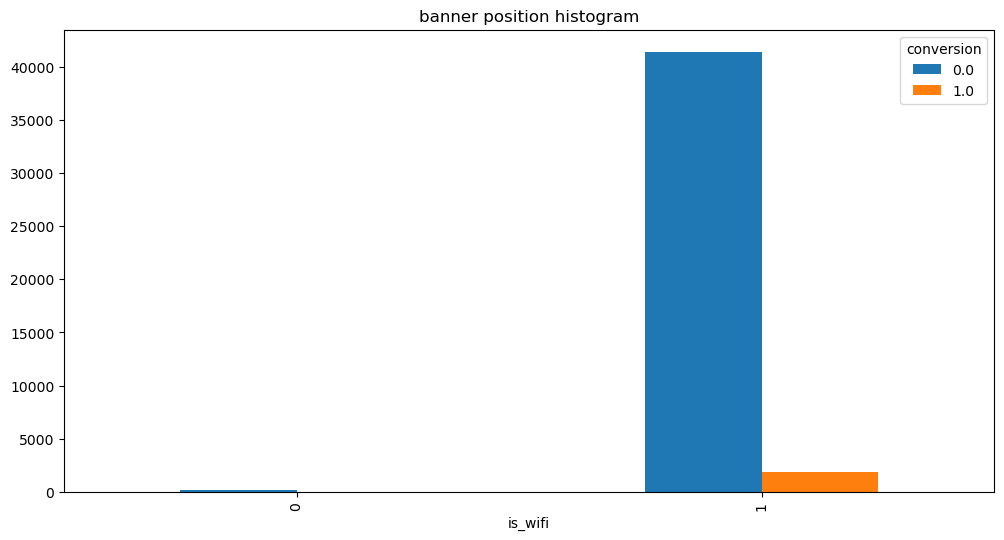

In [32]:
df.groupby(['is_wifi', 'conversion']).size().unstack().plot(kind='bar', figsize=(12,6), title='banner position histogram')

In [33]:
print('Value_counts')
print(df.viewability.value_counts())
print()
print('Describe')
print(df.viewability.describe())

Value_counts
 0     1278
-1      931
 95     920
 84     862
 79     841
       ... 
 10     113
 11     106
 12     101
 15      96
 99      50
Name: viewability, Length: 101, dtype: int64

Describe
count    43390.000000
mean        61.674695
std         27.110740
min         -1.000000
25%         47.000000
50%         68.000000
75%         83.000000
max         99.000000
Name: viewability, dtype: float64


In [34]:
print('Value_counts')
print(df.session_depth.value_counts())
print()
print('Describe')
print(df.session_depth.describe())

Value_counts
-1      27508
 1       8752
 2       1498
 3        596
 4        376
        ...  
 205        1
 110        1
 270        1
 191        1
 255        1
Name: session_depth, Length: 212, dtype: int64

Describe
count    43390.000000
mean         3.127449
std         17.248716
min         -1.000000
25%         -1.000000
50%         -1.000000
75%          1.000000
max        300.000000
Name: session_depth, dtype: float64


In [35]:
print('Value_counts')
print(df.auction_type.value_counts())
print()
print('Describe')
print(df.auction_type.describe())

Value_counts
FIRST_PRICE     41475
SECOND_PRICE     1915
Name: auction_type, dtype: int64

Describe
count           43390
unique              2
top       FIRST_PRICE
freq            41475
Name: auction_type, dtype: object


<AxesSubplot:title={'center':'auction_type'}, xlabel='auction_type'>

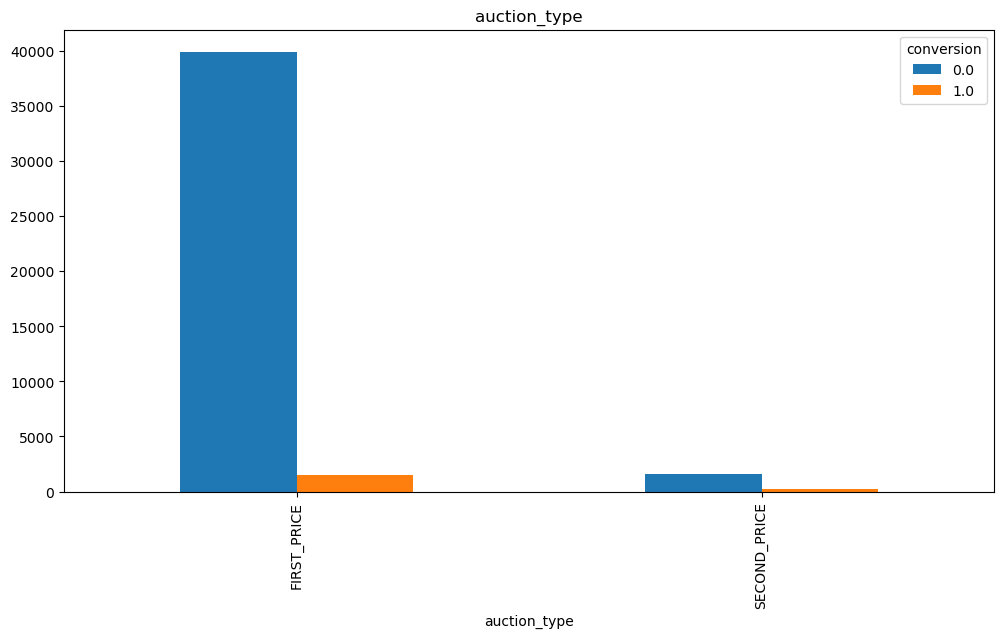

In [36]:
df.groupby(['auction_type', 'conversion']).size().unstack().plot(kind='bar', figsize=(12,6), title='auction_type')

In [37]:
print('Value_counts')
print(df.bidded.value_counts())
print()
print('Describe')
print(df.bidded.describe())

Value_counts
1    43390
Name: bidded, dtype: int64

Describe
count    43390.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: bidded, dtype: float64


<AxesSubplot:title={'center':'bidded'}, xlabel='bidded'>

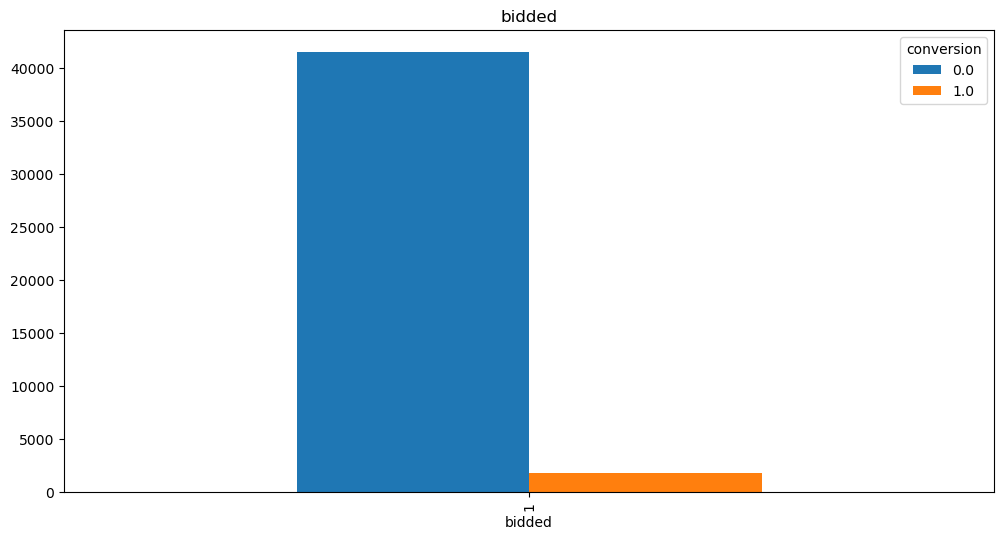

In [38]:
df.groupby(['bidded', 'conversion']).size().unstack().plot(kind='bar', figsize=(12,6), title='bidded')

In [39]:
print('Value_counts')
print(df.bid.value_counts())
print()
print('Describe')
print(df.bid.describe())

Value_counts
0.060000    612
0.126000     18
0.151200     18
0.201600     18
0.183600     16
           ... 
0.216982      1
1.337000      1
5.397269      1
0.328269      1
3.128682      1
Name: bid, Length: 38106, dtype: int64

Describe
count    43390.000000
mean         1.220479
std          2.149521
min          0.060000
25%          0.300000
50%          0.622873
75%          1.309041
max         86.962340
Name: bid, dtype: float64


In [40]:
print('Value_counts')
print(df.won_bid.value_counts())
print()
print('Describe')
print(df.won_bid.describe())

Value_counts
0.0    27909
1.0    15481
Name: won_bid, dtype: int64

Describe
count    43390.000000
mean         0.356787
std          0.479057
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: won_bid, dtype: float64


<AxesSubplot:title={'center':'won_bid'}, xlabel='won_bid'>

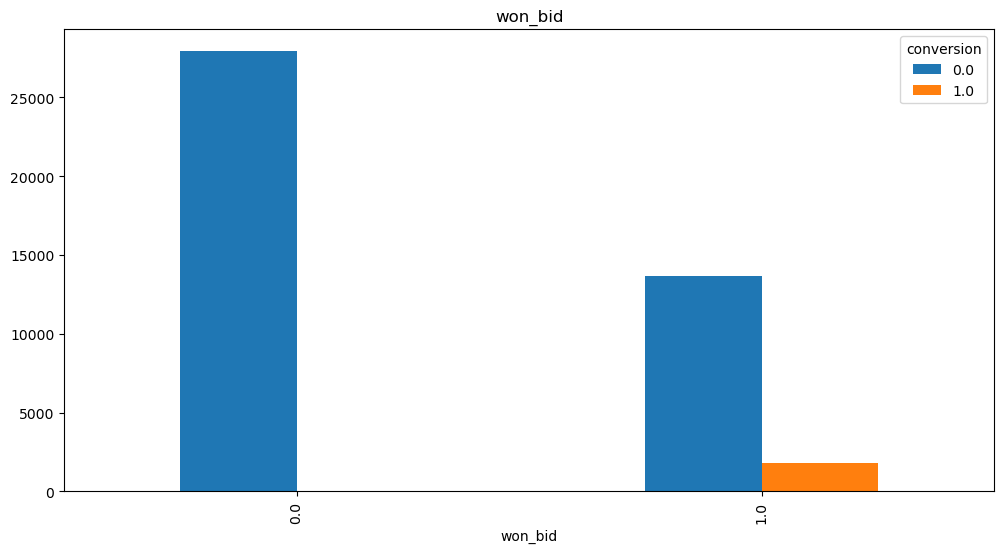

In [41]:
df.groupby(['won_bid', 'conversion']).size().unstack().plot(kind='bar', figsize=(12,6), title='won_bid')

In [42]:
print('Value_counts')
print(df.feedback_bid.value_counts())
print()
print('Describe')
print(df.feedback_bid.describe())

Value_counts
0.320000     639
0.250000     496
0.300000     491
0.040000     433
0.010000     426
            ... 
34.500000      1
21.480000      1
13.600000      1
15.910000      1
18.523844      1
Name: feedback_bid, Length: 1638, dtype: int64

Describe
count    43390.000000
mean         2.772074
std         25.101479
min          0.010000
25%          0.420000
50%          1.120000
75%          2.590000
max       1243.750000
Name: feedback_bid, dtype: float64


In [43]:
print('Value_counts')
print(df.conversion.value_counts())
print()
print('Describe')
print(df.conversion.describe())

Value_counts
0.0    41567
1.0     1823
Name: conversion, dtype: int64

Describe
count    43390.000000
mean         0.042014
std          0.200624
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: conversion, dtype: float64


<AxesSubplot:title={'center':'conversion'}, xlabel='conversion'>

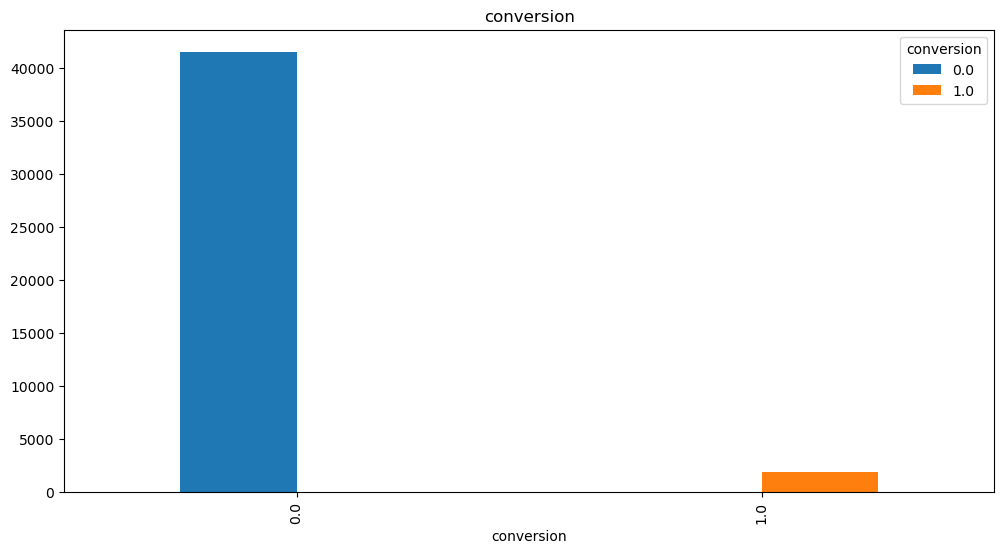

In [44]:
df.groupby(['conversion', 'conversion']).size().unstack().plot(kind='bar', figsize=(12,6), title='conversion')

### 1.
### Summary and visualizations

##### As we can see features user_id, country, screen_orientation have one or each different value, so they could not affect on data and we can drop them. 

##### For each column there is info and description of how much unique values we have and their meanings.

##### Also added visualisation of such features like state_code, detected_language, device_type, device_brand, is_wifi, auction_type, bidded, won_bid and we can see how much clicks were given for each other.

##### Bellow we can see how much was clicked from whole data.


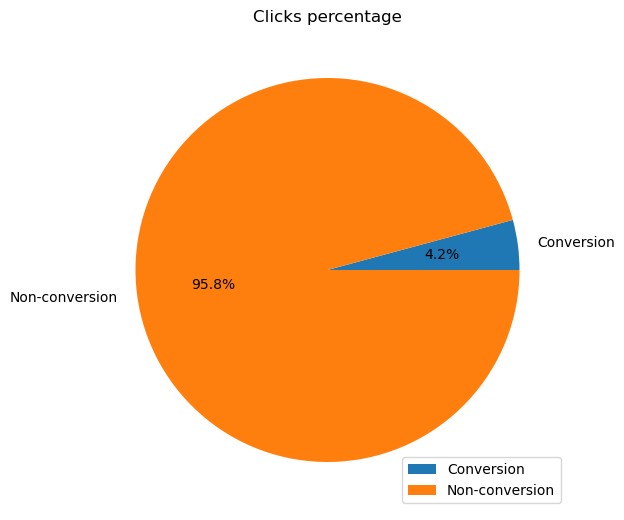

In [45]:
user_id = df['user_id'].tolist()
conversion = df['conversion'].tolist()

total=len(user_id)
prob = []

elements, counts = np.unique(df['conversion'], return_counts=True)

prob.append(int(counts[1])/int(counts[0]+counts[1]))
prob.append(int(counts[0])/int(counts[0]+counts[1]))


products = ['Conversion', 'Non-conversion']
plt.pie(prob, autopct = '%.1f%%', labels = products)
plt.legend(loc = 'lower right', markerfirst = True, numpoints=1)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1)
plt.title('Clicks percentage')
plt.style.use('default')
plt.show()

### 2.
### The most trivial CTR predictor

##### The most trivial CTR predictor is when we can see how much clicks were given in each field of use like when it was given, from which device, how much time were spent at domain, etc. We could just made graphs of clicks and give them weights. By all of those we could calculate if there will be a click with simple algiritms like Byes theorem.


### 3.a.
### Designing, training and evaluating a CTR estimation model

In [46]:
X = df
X

,time,user_id,domain,url,ad_slot,country,postal_code,state_code,city,user_agent,...,publisher_properties,is_wifi,viewability,session_depth,auction_type,bidded,bid,won_bid,feedback_bid,conversion
13,2021-02-01 21:12:51,7ad96658-acc8-4937-90b1-4364a3703d89,84bf368a22dd826a3c4018e2518c734d,0fa8a3c3a4f84031caaf013f584e9119,fb08b7ed41f7e10b51dd2dacf2f4b4c1,US,6824.0,CT,Fairfield,Mozilla/5.0 (iPad; CPU OS 14_3 like Mac OS X) ...,...,c66afd784f43b768d95a6b451161d8d7,1,78,-1,FIRST_PRICE,1,0.239810,1.0,0.24,0.0
16,2021-02-01 03:34:13,fc1f2d6c-4748-4340-ab43-072979cc7474,6b7afebe1382bbae9ae594d2e590a349,347787d250deda7e64c8ec85688431cd,cf566bfb3813d744397494d415f4800d,US,78414.0,TX,Corpus Christi,Mozilla/5.0 (Linux; Android 10; LM-G820) Apple...,...,a841cf8c2487af452679e60a8941348d,1,87,-1,FIRST_PRICE,1,0.785979,1.0,0.44,0.0
19,2021-02-01 13:52:39,aafe54af-499c-49dd-85b4-319d558f2fba,6b7afebe1382bbae9ae594d2e590a349,347787d250deda7e64c8ec85688431cd,cf566bfb3813d744397494d415f4800d,US,34684.0,FL,Palm Harbor,Mozilla/5.0 (Linux; Android 10; SM-N960U Build...,...,a841cf8c2487af452679e60a8941348d,1,85,-1,FIRST_PRICE,1,0.475619,0.0,1.12,0.0
22,2021-02-01 04:28:37,c24b65ca-f2b1-4b67-bfde-9e1dd8a9f70d,0a6a274ee0eebb2078a908ef35d4da1c,415f483f3055bc601bd6a7f1efa04618,cedbfd1c95f784654d3ba631bccbd207,US,44131.0,OH,Bedford,Mozilla/5.0 (Linux; Android 10; LM-V350) Apple...,...,58481c56ad3c48f93b93817d6e2a2cbb,1,76,-1,FIRST_PRICE,1,2.732400,0.0,7.14,0.0
25,2021-02-01 13:16:01,aae5c839-e268-453f-8e33-db50d7c5eeea,c1046ab79c9568fd2260c3073287937f,266f10dd8342f3719524d9e580b8426f,9475cbf349bea72bd1727377c4125703,US,68850.0,NE,Omaha,Mozilla/5.0 (Linux; Android 10; SM-G960U Build...,...,e6d396c6112b145c61e8736465453674,1,78,4,FIRST_PRICE,1,1.290821,0.0,1.95,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249207,2021-02-01 09:40:17,648d1fe9-4c81-452e-9006-1595dd2f3c91,62c83b414837c0346361fa96e0e49ee3,3d6a5887deaa3f36e75f083766c56a8e,557f7c1d352e987943735917086f9ef4,US,98027.0,WA,Redmond,Mozilla/5.0 (Linux; Android 11; SM-N975U Build...,...,0e67e5ac52c43c9a810c344540525fff,1,72,1,FIRST_PRICE,1,8.956529,1.0,1.25,1.0
249209,2021-02-01 00:04:06,5812f075-31b8-479d-99f8-9b30ad8dcc1c,5333df483c5e71176ddeaee9ed0429f2,d4cbb77326a6ef07671802ba091ab455,7c6f97674a30534fa0be46c7fca62684,US,94605.0,CA,Oakland,Mozilla/5.0 (iPhone; CPU iPhone OS 14_4 like M...,...,ca920bafdb718bd4e9964876863ac88b,1,28,-1,FIRST_PRICE,1,0.202352,1.0,0.20,0.0
249210,2021-02-01 02:07:54,eab42073-4ee3-41ab-95cb-68bdab7e15ad,8b04c90a35224e289bddd5c30e7ce71a,6f42bc8309262f0410052052bddd0a4e,2dec94733a24ab8514eba29d3150dc1f,US,63141.0,MO,Ballwin,Mozilla/5.0 (iPhone; CPU iPhone OS 14_3 like M...,...,97e9044692d3df04de93f6450265cb2e,1,91,-1,FIRST_PRICE,1,0.163200,0.0,0.30,0.0
249213,2021-02-01 19:30:27,55c0e94b-e95e-418b-b965-4e24f9cf065f,72176b0a9cef78b04179f9f273464ce1,36d39a45a5547f25996174ada1b86633,1fba9ddfc4385a57a4ddedefb19d978c,US,85339.0,AZ,Phoenix,Mozilla/5.0 (iPhone; CPU iPhone OS 14_4 like M...,...,c66afd784f43b768d95a6b451161d8d7,1,73,-1,FIRST_PRICE,1,1.437530,1.0,0.53,0.0


In [47]:
def convert_obj_to_int(self):
    
    object_list_columns = self.columns
    object_list_dtypes = self.dtypes
    new_col_suffix = '_int'
    for index in range(0,len(object_list_columns)):
        if object_list_dtypes[index] == object :
            self[object_list_columns[index]+new_col_suffix] = self[object_list_columns[index]].map( lambda  x: hash(x))
            self.drop([object_list_columns[index]],inplace=True,axis=1)
    return self

y = X['conversion']
X = X.drop(['user_id', 'conversion', 'country', 'screen_orientation'], axis=1)

X = convert_obj_to_int(X)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [49]:
from sklearn.linear_model import LogisticRegression
time6 = datetime.now() 

clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(y_pred)

test_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)
print("train_acc: ", train_acc)
print("test_acc: ", test_acc)

[0. 0. 0. ... 0. 0. 0.]
train_acc:  0.9586687972466351
test_acc:  0.9559365781710915


C:\Users\jenga\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

print(clf.predict(X_test))
test_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print("train_acc: ", train_acc)
print("test_acc: ", test_acc)

[0. 0. 0. ... 0. 0. 0.]
train_acc:  0.9217626451969763
test_acc:  0.9228429203539823


In [51]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, y_train)

print(clf.predict(X_test))
test_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print("train_acc: ", train_acc)
print("test_acc: ", test_acc)

[0. 0. 0. ... 0. 0. 0.]
train_acc:  0.9577776412021388
test_acc:  0.9552912979351033


In [52]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

print(clf.predict(X_test))
test_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print("train_acc: ", train_acc)
print("test_acc: ", test_acc)

[0. 0. 0. ... 0. 0. 0.]
train_acc:  0.9592833876221498
test_acc:  0.9560287610619469


In [53]:
import lightgbm as lgb

X_train = X
y_target = y
#create lightgbm dataset
msk = np.random.rand(len(X_train)) < 0.8
lgb_train = lgb.Dataset(X_train[msk], y_target[msk])
lgb_eval = lgb.Dataset(X_train[~msk], y_target[~msk], reference=lgb_train)

# specify your configurations as a dict
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': { 'binary_logloss'},
    'num_leaves': 31, # defauly leaves(31) amount for each tree
    'learning_rate': 0.08,
    'feature_fraction': 0.7, # will select 70% features before training each tree
    'bagging_fraction': 0.3, #feature_fraction, but this will random select part of data
    'bagging_freq': 5, #  perform bagging at every 5 iteration
    'verbose': 0
}

print('Start training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=4000,
                valid_sets=lgb_eval,
                early_stopping_rounds=500)

Start training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001720 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	valid_0's binary_logloss: 0.151811
Training until validation scores don't improve for 500 rounds
[2]	valid_0's binary_logloss: 0.145148
[3]	valid_0's binary_logloss: 0.140436
[4]	valid_0's binary_logloss: 0.136882
[5]	valid_0's binary_logloss: 0.133895
[6]	valid_0's binary_logloss: 0.131555
[7]	valid_0's binary_logloss: 0.129263
[8]	valid_0's binary_logloss: 0.127238
[9]	valid_0's binary_logloss: 0.125586
[10]	valid_0's binary_logloss: 0.124018
[11]	valid_0's binary_logloss: 0.123625
[12]	valid_0's binary_logloss: 0.122556
[13]	valid_0's binary_logloss: 0.121626
[14]	valid_0's binary_logloss: 0.120667
[15]	valid_0's binary_logloss: 0.119637
[16]	valid_0's binary_logloss: 0.11878
[17]	valid_0's binary_logloss: 0.118426
[18]	valid_0's binary_logloss: 0.117827
[19]	valid_0's binary_logloss: 0.117431
[20]	

C:\Users\jenga\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[137]	valid_0's binary_logloss: 0.114622
[138]	valid_0's binary_logloss: 0.114818
[139]	valid_0's binary_logloss: 0.114872
[140]	valid_0's binary_logloss: 0.114941
[141]	valid_0's binary_logloss: 0.115004
[142]	valid_0's binary_logloss: 0.115055
[143]	valid_0's binary_logloss: 0.115024
[144]	valid_0's binary_logloss: 0.11499
[145]	valid_0's binary_logloss: 0.115135
[146]	valid_0's binary_logloss: 0.115054
[147]	valid_0's binary_logloss: 0.115201
[148]	valid_0's binary_logloss: 0.115331
[149]	valid_0's binary_logloss: 0.115404
[150]	valid_0's binary_logloss: 0.115272
[151]	valid_0's binary_logloss: 0.115423
[152]	valid_0's binary_logloss: 0.115295
[153]	valid_0's binary_logloss: 0.115355
[154]	valid_0's binary_logloss: 0.115509
[155]	valid_0's binary_logloss: 0.115704
[156]	valid_0's binary_logloss: 0.115872
[157]	valid_0's binary_logloss: 0.115908
[158]	valid_0's binary_logloss: 0.116018
[159]	valid_0's binary_logloss: 0.116085
[160]	valid_0's binary_logloss: 0.116141
[161]	valid_0's 

[448]	valid_0's binary_logloss: 0.130479
[449]	valid_0's binary_logloss: 0.130539
[450]	valid_0's binary_logloss: 0.130596
[451]	valid_0's binary_logloss: 0.130489
[452]	valid_0's binary_logloss: 0.130337
[453]	valid_0's binary_logloss: 0.130351
[454]	valid_0's binary_logloss: 0.130383
[455]	valid_0's binary_logloss: 0.130442
[456]	valid_0's binary_logloss: 0.130302
[457]	valid_0's binary_logloss: 0.1304
[458]	valid_0's binary_logloss: 0.130264
[459]	valid_0's binary_logloss: 0.130238
[460]	valid_0's binary_logloss: 0.130078
[461]	valid_0's binary_logloss: 0.129902
[462]	valid_0's binary_logloss: 0.129853
[463]	valid_0's binary_logloss: 0.129935
[464]	valid_0's binary_logloss: 0.129912
[465]	valid_0's binary_logloss: 0.129982
[466]	valid_0's binary_logloss: 0.129794
[467]	valid_0's binary_logloss: 0.129888
[468]	valid_0's binary_logloss: 0.129959
[469]	valid_0's binary_logloss: 0.129924
[470]	valid_0's binary_logloss: 0.130087
[471]	valid_0's binary_logloss: 0.130165
[472]	valid_0's bi

### 3.b.
### Feature selection

##### Three features were droped: "user_id" because each request had its unique user id. "Country" and "screen_orientation" because there is only one unique value for them and it doesn't help.

##### Also there are many features that could help us to build right model. We could calculate them with different options.

### 4.
### Comparing model and the trivial CTR predictor

##### It is possible to compare this model with trivial CTR by thaking little data and calculate by Naive Beyes theorem. And compare with simillar data from the model. The problem is that wee need a lot of data to learn and compare for good results.

### 5.
### Refining the model

##### We could reduce data with no clicks on it to ballance target class and recieve more reliable results.
##### Alse there are many options to collaborate with different features and use different methods to change shape of data like binning, smoothing etc.

In [54]:
print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(datetime.now() - start_time))

Time elapsed in (hh:mm:ss.ms): "0:00:22.945873"
